<a href="https://colab.research.google.com/github/JoseLuisHerme/Scientific_ML_Project/blob/main/Exploratory_Data_Analysis_on_Real_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: Exploratory Data Analysis (EDA) on Real Dataset.


###By: Ademide (Midé) Mabadeje, Jose Hernandez Mejia, Stella FillmorePatrick

Let's install the packages needed for the code demonstrations below and import accordingly.

In [ ]:
# Import packages as neede
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import string

Load the dataset of choice and obtain the name of the multidimensional features and sample size.

In [ ]:
df = pd.read_csv('rodpump_failure 2.csv')

columns = list(df.columns)

print(columns)
len(df)

['UWI', 'lifetime_start', 'lifetime_end', 'FAILSTART', 'FAILURETYPE', 'H2S_CONCENTRATION', 'StrokeLength', 'gas_anchor_length', 'MAX_INCLINATION', 'wellbore_category', 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING', 'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME', 'AVG_WATERSG', 'rod_sinker_type', 'rod_has_guides', 'overall_max_sideload', 'shallow_max_sideload', 'max_unguided_sideload', 'ENDURALLOY_LENGTH', 'NIPPLE_SET_DEPTH', 'pump_bore']


2596

Create histograms for univariate analysis of features

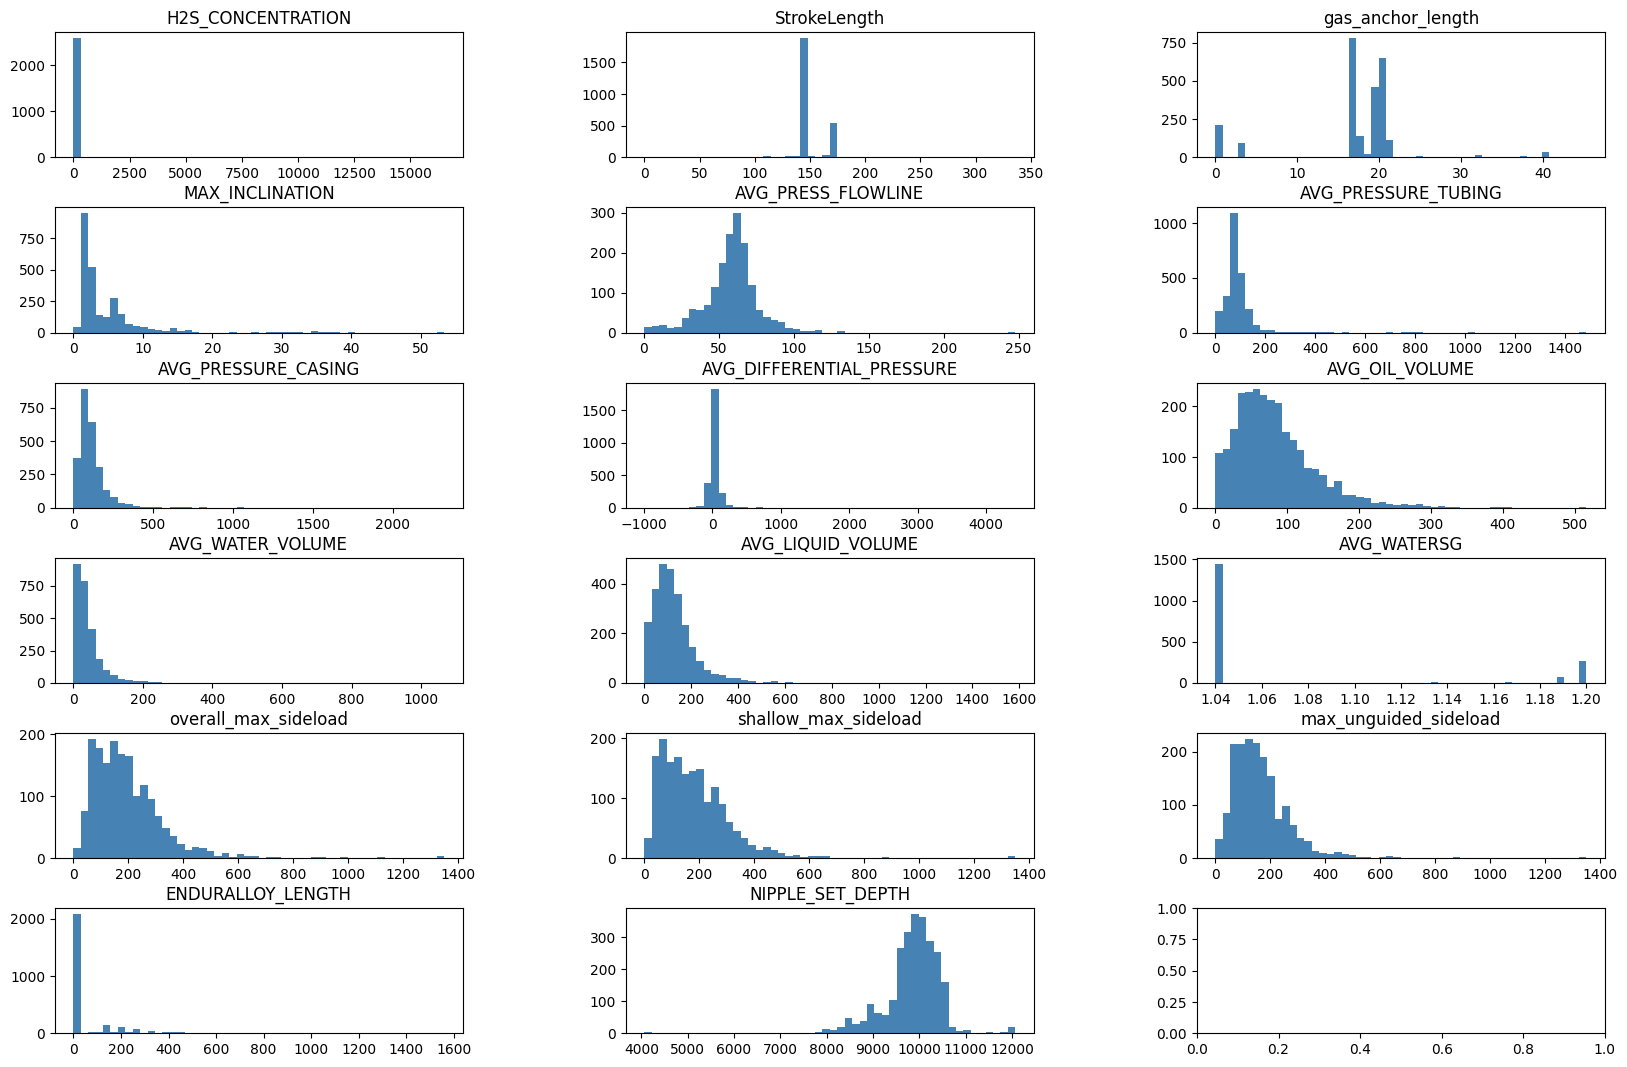

In [ ]:
#histograms
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

nrows = len(num_cols)//3 + 1 
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(num_cols):
    row = i//ncols
    coll = i%ncols
    axs[row, coll].hist(df[col], bins=50, color='steelblue')
    axs[row, coll].set_title(col)

plt.show()

To avoid outlier pulls within the data when performing correlation, Spearman rank correlation is used to check for linear associations between each feature. For visualization ease, each predictor feature was coded using the english alphabet in sequence as the variable names were too long.

<Axes: >

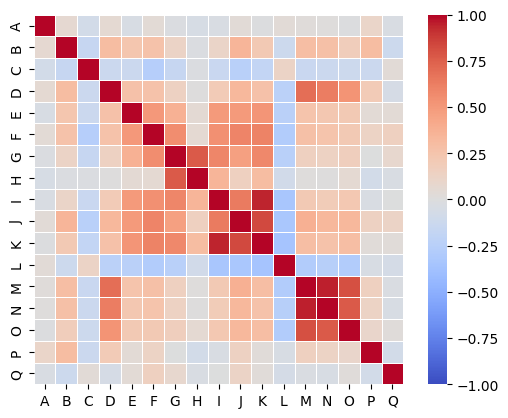

In [ ]:
# Compute Spearman's correlation matrix
corr = df[num_cols].corr(method='spearman')

# Create alphabet labels
alphabet_labels = list(string.ascii_uppercase)[:len(num_cols)]

# Create heatmap with alphabet labels
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar=True,
            xticklabels=alphabet_labels, yticklabels=alphabet_labels)


After identifying predictor features of interest, we rename the alphabets to the actual features of interest as given in the actual dataset.

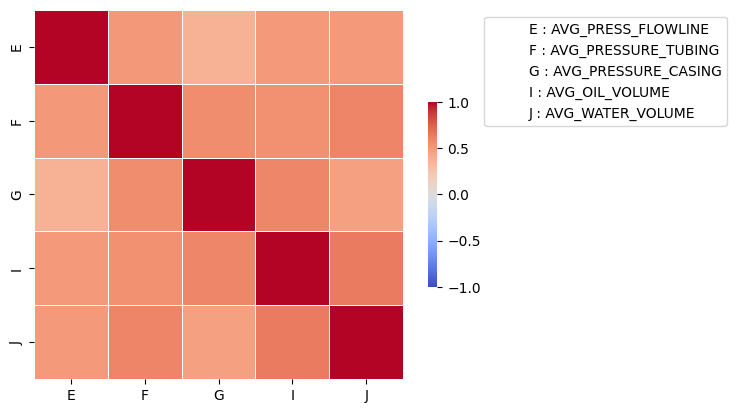

In [ ]:


#Spearman's correlation matrix for five features
our_features = df[['AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME']]

corr = our_features.corr(method='spearman')

# Create labels
alphabet_labels2 = ['E','F','G','I','J']

label_to_feature = ['E : AVG_PRESS_FLOWLINE', 'F : AVG_PRESSURE_TUBING',
                    'G : AVG_PRESSURE_CASING', 'I : AVG_OIL_VOLUME', 'J : AVG_WATER_VOLUME']

# Create heatmap with labels
ax = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar=True,
            xticklabels=alphabet_labels2, yticklabels=alphabet_labels2, cbar_kws={"shrink": .5})

#Create legend
legend_handles = [mpatches.Patch(facecolor='none', edgecolor='none', label=label) for label in label_to_feature]
ax.legend(handles=legend_handles, labels=label_to_feature, bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

Using the modified dataset that was modified to 5 predictor features of interest, we visualize the bivariate scatter plot and histograms. This modified dataset is the input for our proposed AE-DBSCAN method

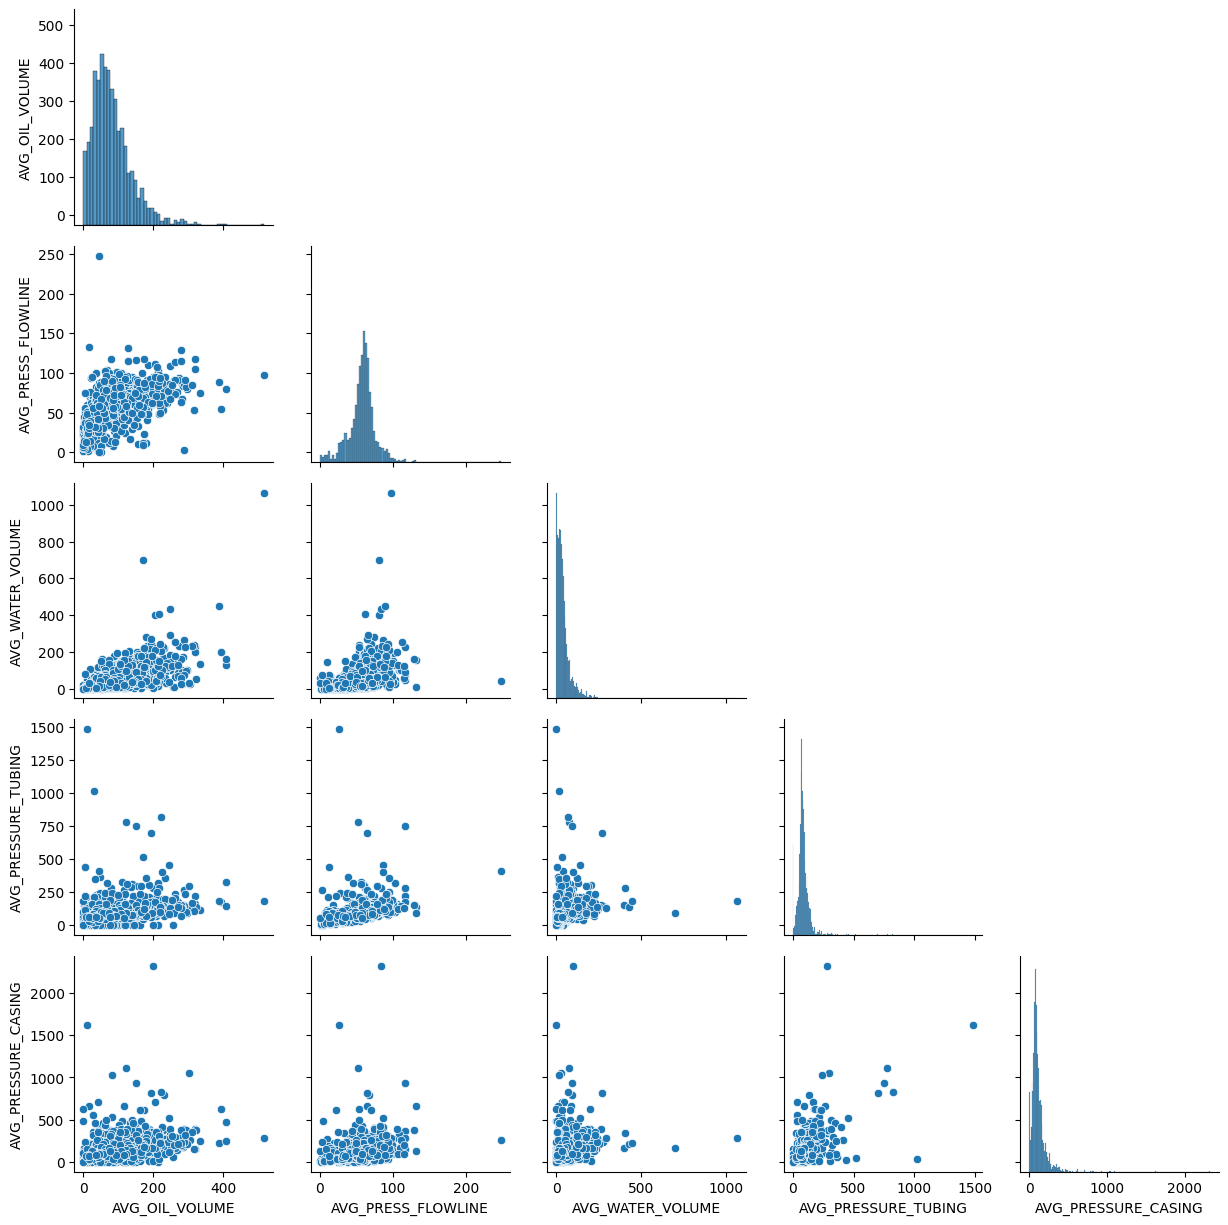

In [ ]:
#Histograms for five features

# Create the pairplot
g = sns.PairGrid(our_features)
g.map_upper(plt.scatter)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=False)

# Remove the repeated plots above the diagonal
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].remove()

plt.show()
